# PROYECTO 4

Basado en los proyectos 1 y 2 se eligió continuar con el análisis de properati pero esta vez extrayendo un dataset directamente de la página: https://www.properati.com.co/data/
El cual está enfocado en Colombia con el fin de realizar un análisis de la misma y centrarnos en aquella región con mas ítems y a la vez poder poner en practica todo lo aprendido teniendo en cuenta el preprocesamiento y transformación de datos a través de la imputación de valores análisis de outliers y demás herramientas que nos permitirán ir llevando el dataset a uno más comprensible y que a su vez nos permita ejecutar correctamente modelos de machine learning.

### Repositorio GIT HUB

In [ ]:
https://github.com/AndresQ24/Proyecto-4/blob/main/Proyecto%204.ipynb

### Punto de partida

Iniciamos cargando las librerías que nos permitirán profundizar y analizar en el dataset

In [394]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [395]:
#Cargamos nuestro dataset el cual fue extraido de https://www.properati.com.co/data/, en la opcion datasets/datasets CSV(por pais). 

dataset_properati = pd.read_csv('co_properties.csv')

print(dataset_properati.shape)

dataset_properati.head()

(1000000, 25)


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,TqzIOWqOw3cB0pUQ8PQmpQ==,Propiedad,2020-03-29,2020-03-31,2020-03-29,NaN,NaN,Colombia,Valle del Cauca,Cali,...,2.0,NaN,NaN,1200000.0,COP,NaN,"CASA EN ARRIENDO, CALI-COLSEGUROS",Alquilamos Amplio Apartamento en 2do Piso en e...,Casa,Arriendo
1,i+CtIEp8mZaFFUw9UKoR7A==,Propiedad,2020-03-29,2020-04-20,2020-03-29,3.354000,-76.542000,Colombia,Valle del Cauca,Cali,...,4.0,NaN,NaN,3000000.0,COP,NaN,Apartamento En Arriendo En Cali Pance CodABBNC...,"Bienco Alquila Apto primer piso, ventilado, il...",Casa,Arriendo
2,wDD/QJgLrlmOSQTMHbPJFA==,Propiedad,2020-03-29,2020-05-09,2020-03-29,3.399714,-76.539912,Colombia,Valle del Cauca,Cali,...,5.0,NaN,NaN,500000000.0,COP,NaN,CASA EN SANTA ANITA GQP _ wasi2453589,¡¡¡VENDO CASA EN SANTA ANITA!<div>< _div><div...,Casa,Venta
3,WO3kzVZLDkfVChi+O162uA==,Propiedad,2020-03-29,2020-05-09,2020-03-29,3.382361,-76.541305,Colombia,Valle del Cauca,Cali,...,4.0,NaN,NaN,235000000.0,COP,NaN,Casa ciudad Córdoba GQP _ wasi2457808,VENDO casa en ciudad Córdoba de tres pisos ind...,Casa,Venta
4,5Mu2GO2GgJiOZ4TBYfiQ2Q==,Propiedad,2020-03-29,2020-05-13,2020-03-29,3.422000,-76.566000,Colombia,Valle del Cauca,Cali,...,2.0,NaN,NaN,750000.0,COP,NaN,Apartamento En Arriendo En Cali Ciudad Pacífic...,Hermoso apartamento ubicado en ciudad pacífica...,Casa,Arriendo


**ANALISIS EXPLORATORIO DE DATOS**

Iniciamos con nuestro análisis exploratorio de datos y a su vez procedemos a quitar aquellas columnas que de momento no usaremos o no están aportando dentro de las características que queremos dejar para realizar nuestro análisis/predicción.

In [396]:
dataset_properati = dataset_properati.drop(columns=['id','ad_type','start_date','end_date','l1','created_on','price_period','title','description','l5','l6']) 

Ahora procedemos a renombrar algunas columnas con el fin de que sean más comprensibles a la hora de desarrollar nuestro análisis.

In [397]:
#Para el caso de la columna l2 procederemos a renombrarla como region
dataset_properati.rename({'l2': 'region'},axis=1,inplace=True)

#Para el caso de la columna l3 procederemos a renombrarla como ciudad
dataset_properati.rename({'l3': 'ciudad'},axis=1,inplace=True)

#Para el caso de la columna l4 procederemos a renombrarla como ciudad
dataset_properati.rename({'l4': 'barrio'},axis=1,inplace=True)

In [398]:
dataset_properati.head()

,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
0,NaN,NaN,Valle del Cauca,Cali,NaN,NaN,4.0,2.0,NaN,NaN,1200000.0,COP,Casa,Arriendo
1,3.354000,-76.542000,Valle del Cauca,Cali,NaN,NaN,NaN,4.0,NaN,NaN,3000000.0,COP,Casa,Arriendo
2,3.399714,-76.539912,Valle del Cauca,Cali,NaN,NaN,NaN,5.0,NaN,NaN,500000000.0,COP,Casa,Venta
3,3.382361,-76.541305,Valle del Cauca,Cali,NaN,NaN,NaN,4.0,NaN,NaN,235000000.0,COP,Casa,Venta
4,3.422000,-76.566000,Valle del Cauca,Cali,NaN,NaN,NaN,2.0,NaN,NaN,750000.0,COP,Casa,Arriendo


In [399]:
dataset_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   lat              732139 non-null   float64
 1   lon              732140 non-null   float64
 2   region           1000000 non-null  object 
 3   ciudad           947921 non-null   object 
 4   barrio           257699 non-null   object 
 5   rooms            146658 non-null   float64
 6   bedrooms         269093 non-null   float64
 7   bathrooms        819184 non-null   float64
 8   surface_total    44940 non-null    float64
 9   surface_covered  64576 non-null    float64
 10  price            999629 non-null   float64
 11  currency         999604 non-null   object 
 12  property_type    1000000 non-null  object 
 13  operation_type   1000000 non-null  object 
dtypes: float64(8), object(6)
memory usage: 106.8+ MB


In [400]:
print(dataset_properati.isna().sum()) #A través de la función .isna() es posible determinar los valores faltantes/nulos;
                                      #Sin embargo se agrega a la función .sum() para poder hacer el conteo y visualizarlo correctamente.

lat                267861
lon                267860
region                  0
ciudad              52079
barrio             742301
rooms              853342
bedrooms           730907
bathrooms          180816
surface_total      955060
surface_covered    935424
price                 371
currency              396
property_type           0
operation_type          0
dtype: int64


Esta validacion nos permite determinar que una de las mejores variables por las cuales enfocar nuestro analisis es la de region

In [401]:
dataset_properati.property_type.value_counts()

Apartamento        557910
Casa               224150
Otro               134499
Lote                41864
Local comercial     19676
Oficina             16169
Finca                4961
Depósito              669
Parqueadero           102
Name: property_type, dtype: int64

In [402]:
dataset_properati.operation_type.value_counts()

Venta                560636
Arriendo             439078
Arriendo temporal       286
Name: operation_type, dtype: int64

In [403]:
dataset_properati.currency.value_counts()

COP    999576
USD        23
ARS         5
Name: currency, dtype: int64

In [404]:
dataset_properati.region.value_counts()

Antioquia                                  342683
Cundinamarca                               200916
Valle del Cauca                            115771
Caldas                                      77537
Santander                                   73066
Atlántico                                   68647
Risaralda                                   28047
Norte de Santander                          25493
Quindío                                     13825
Bolívar                                     13497
Tolima                                       8737
Cauca                                        8109
Meta                                         6907
Magdalena                                    4679
Nariño                                       3333
Huila                                        3017
Boyacá                                       1581
Casanare                                     1310
Cesar                                        1164
Córdoba                                       644


In [405]:
dataset_properati.ciudad.value_counts()

Medellín         267217
Bogotá D.C       162088
Cali              94121
Manizales         67361
Barranquilla      65891
                  ...  
Toledo                1
Puerto Rondón         1
Pasca                 1
Bituima               1
Pailitas              1
Name: ciudad, Length: 339, dtype: int64

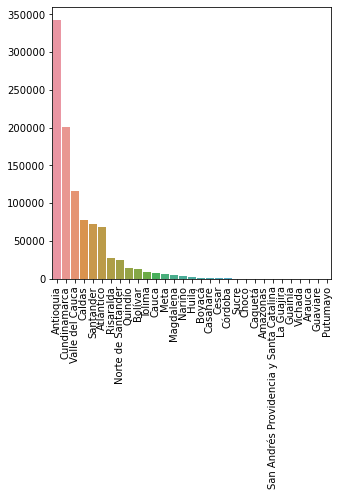

In [406]:
region = dataset_properati.region.value_counts()
barrio = dataset_properati.ciudad.value_counts()

#Creamos un subplot de 2 filas y 1 columna para ubicar nuestros gráficos. Se agrega un tamaño/figsize que nos permita visualizar las gráficas adecuadamente
#fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize=(25,25))  

#Procedemos a indicar posición de cada uno de los gráficos y su respectivo título de acuerdo al eje.

sns.barplot(x = region.index, y = region.values)
plt.xticks(rotation=90)

plt.show()

Con base a los análisis realizados hasta ahora y apoyándonos de esta grafica nos enfocaremos en la región de Antioquia para a su vez predecir el precio de las propiedades de acuerdo al tipo de propiedad.

In [407]:
Antioquia =pd.DataFrame()

Antioquia = dataset_properati[(dataset_properati['region']=='Antioquia')] #Dejamos unicamente la region de interes

Antioquia = dataset_properati[(dataset_properati['currency']=='COP')] #Con el fin de generar un mejor analisis unicamente dejamos la moneda/divisa colombiana

Antioquia = dataset_properati[(dataset_properati['operation_type']=='Venta')] #En el tipo de operacion nos enfocamos en venta descartando operaciones de arriendo y 
                                                                              # arriendo temporal   

In [408]:
Antioquia.head()

,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,property_type,operation_type
2,3.399714,-76.539912,Valle del Cauca,Cali,NaN,NaN,NaN,5.0,NaN,NaN,500000000.0,COP,Casa,Venta
3,3.382361,-76.541305,Valle del Cauca,Cali,NaN,NaN,NaN,4.0,NaN,NaN,235000000.0,COP,Casa,Venta
8,4.805557,-75.754193,Risaralda,Pereira,NaN,NaN,NaN,3.0,NaN,NaN,240000000.0,COP,Casa,Venta
9,4.797383,-75.723107,Risaralda,Pereira,NaN,NaN,NaN,3.0,NaN,NaN,800000000.0,COP,Casa,Venta
10,3.254355,-76.539370,Valle del Cauca,Jamundí,NaN,NaN,NaN,3.0,NaN,NaN,330000000.0,COP,Casa,Venta


In [409]:
print(Antioquia.isna().sum()) 

lat                134076
lon                134075
region                  0
ciudad              38600
barrio             417127
rooms              460237
bedrooms           398566
bathrooms          133973
surface_total      537348
surface_covered    529155
price                 228
currency              248
property_type           0
operation_type          0
dtype: int64


**PREPROCESAMIENTO / Transformación de Datos**

**Imputacion de valores faltantes para las variables surface_total y surface_covered**

In [410]:
#En esta parte se reemplazan los valores faltantes de superficie cubierta por los de superficie total.
Antioquia.surface_covered.fillna(Antioquia.surface_total, inplace=True) 

#Para este caso se reemplazan los valores faltantes de superficie total por los de superficie cubierta.
Antioquia.surface_total.fillna(Antioquia.surface_covered, inplace=True) 

D:\Miniconda\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [411]:
'''Una vez realizado el reemplazo de valores nos quedaremos únicamente con la columna de superficie total (Surface_total) 
ya que si dejáramos ambas columnas estaríamos trabajando en gran medida con valores repetidos.'''

Antioquia.drop(columns = ['surface_covered'], inplace=True) 

D:\Miniconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [412]:
print(Antioquia.isna().sum())

lat               134076
lon               134075
region                 0
ciudad             38600
barrio            417127
rooms             460237
bedrooms          398566
bathrooms         133973
surface_total     527187
price                228
currency             248
property_type          0
operation_type         0
dtype: int64


In [413]:
FiltroSurface = Antioquia[['surface_total','property_type']].groupby('property_type').agg(pd.Series.median)

#Creamos un diccionario para tener una idea más clara de la información que nos está generando al agrupar.
FiltroSurface.to_dict()

D:\Miniconda\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{'surface_total': {'Apartamento': 90.0,
  'Casa': 208.5,
  'Depósito': nan,
  'Finca': 4978.0,
  'Local comercial': 63.0,
  'Lote': 2048.0,
  'Oficina': 71.0,
  'Otro': 400.0,
  'Parqueadero': 525.0}}

In [414]:
#Establecemos property type como el índice del dataset para poder realizar el proceso de imputación.
Antioquia = Antioquia.set_index('property_type')

#Procedemos a filtrar los valores que aparecen como na para reemplazarlos con el diccionario generado
Antioquia.surface_total.fillna(FiltroSurface.to_dict()['surface_total'],inplace=True)

#Procedemos a resetear el índice con la finalidad de dejar el original; es decir que property_type deje de ser el índice para que no nos afecte en otros procesos y para poder usarlo en otras imputaciones.
Antioquia.reset_index(inplace=True)

Antioquia.head()

,property_type,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
0,Casa,3.399714,-76.539912,Valle del Cauca,Cali,NaN,NaN,NaN,5.0,208.5,500000000.0,COP,Venta
1,Casa,3.382361,-76.541305,Valle del Cauca,Cali,NaN,NaN,NaN,4.0,208.5,235000000.0,COP,Venta
2,Casa,4.805557,-75.754193,Risaralda,Pereira,NaN,NaN,NaN,3.0,208.5,240000000.0,COP,Venta
3,Casa,4.797383,-75.723107,Risaralda,Pereira,NaN,NaN,NaN,3.0,208.5,800000000.0,COP,Venta
4,Casa,3.254355,-76.539370,Valle del Cauca,Jamundí,NaN,NaN,NaN,3.0,208.5,330000000.0,COP,Venta


In [415]:
print(Antioquia.isna().sum())

property_type          0
lat               134076
lon               134075
region                 0
ciudad             38600
barrio            417127
rooms             460237
bedrooms          398566
bathrooms         133973
surface_total        294
price                228
currency             248
operation_type         0
dtype: int64


**Imputacion de valores faltantes para la variable bathrooms**

Ahora se procederá a realizar este procedimiento para la columna bathrooms

In [416]:
FiltroBathrooms = dataset_properati[['bathrooms','property_type']].groupby('property_type').agg(pd.Series.median)
FiltroBathrooms.to_dict()

D:\Miniconda\lib\site-packages\numpy\lib\nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


{'bathrooms': {'Apartamento': 2.0,
  'Casa': 3.0,
  'Depósito': nan,
  'Finca': 4.0,
  'Local comercial': 1.0,
  'Lote': 2.0,
  'Oficina': 1.0,
  'Otro': 1.0,
  'Parqueadero': 2.0}}

In [417]:
Antioquia = Antioquia.set_index('property_type')
Antioquia.bathrooms.fillna(FiltroBathrooms.to_dict()['bathrooms'],inplace=True)
Antioquia.reset_index(inplace=True)
Antioquia.head()

,property_type,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
0,Casa,3.399714,-76.539912,Valle del Cauca,Cali,NaN,NaN,NaN,5.0,208.5,500000000.0,COP,Venta
1,Casa,3.382361,-76.541305,Valle del Cauca,Cali,NaN,NaN,NaN,4.0,208.5,235000000.0,COP,Venta
2,Casa,4.805557,-75.754193,Risaralda,Pereira,NaN,NaN,NaN,3.0,208.5,240000000.0,COP,Venta
3,Casa,4.797383,-75.723107,Risaralda,Pereira,NaN,NaN,NaN,3.0,208.5,800000000.0,COP,Venta
4,Casa,3.254355,-76.539370,Valle del Cauca,Jamundí,NaN,NaN,NaN,3.0,208.5,330000000.0,COP,Venta


In [418]:
print(Antioquia.isna().sum())

property_type          0
lat               134076
lon               134075
region                 0
ciudad             38600
barrio            417127
rooms             460237
bedrooms          398566
bathrooms            294
surface_total        294
price                228
currency             248
operation_type         0
dtype: int64


**Imputacion de valores faltantes para la variable rooms**

Ahora se procederá a realizar este procedimiento para la columna rooms

In [419]:
FiltroRooms = Antioquia[['rooms','property_type']].groupby('property_type').agg(pd.Series.median)
FiltroRooms.to_dict()

{'rooms': {'Apartamento': 3.0,
  'Casa': 4.0,
  'Depósito': 3.0,
  'Finca': 4.0,
  'Local comercial': 2.0,
  'Lote': 3.0,
  'Oficina': 1.0,
  'Otro': 4.0,
  'Parqueadero': 3.0}}

In [420]:
Antioquia = Antioquia.set_index('property_type')
Antioquia.rooms.fillna(FiltroRooms.to_dict()['rooms'],inplace=True)
Antioquia.reset_index(inplace=True)
Antioquia.head()

,property_type,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
0,Casa,3.399714,-76.539912,Valle del Cauca,Cali,NaN,4.0,NaN,5.0,208.5,500000000.0,COP,Venta
1,Casa,3.382361,-76.541305,Valle del Cauca,Cali,NaN,4.0,NaN,4.0,208.5,235000000.0,COP,Venta
2,Casa,4.805557,-75.754193,Risaralda,Pereira,NaN,4.0,NaN,3.0,208.5,240000000.0,COP,Venta
3,Casa,4.797383,-75.723107,Risaralda,Pereira,NaN,4.0,NaN,3.0,208.5,800000000.0,COP,Venta
4,Casa,3.254355,-76.539370,Valle del Cauca,Jamundí,NaN,4.0,NaN,3.0,208.5,330000000.0,COP,Venta


**Imputacion de valores faltantes para la variable bedrooms**

Ahora se procederá a realizar este procedimiento para la columna bedrooms

In [421]:
Filtrobedrooms = Antioquia[['bedrooms','property_type']].groupby('property_type').agg(pd.Series.median)
Filtrobedrooms.to_dict()

{'bedrooms': {'Apartamento': 3.0,
  'Casa': 4.0,
  'Depósito': 3.0,
  'Finca': 4.0,
  'Local comercial': 0.0,
  'Lote': 0.0,
  'Oficina': 0.0,
  'Otro': 4.0,
  'Parqueadero': 1.0}}

In [422]:
Antioquia = Antioquia.set_index('property_type')
Antioquia.rooms.fillna(Filtrobedrooms.to_dict()['bedrooms'],inplace=True)
Antioquia.reset_index(inplace=True)
Antioquia.head()

,property_type,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
0,Casa,3.399714,-76.539912,Valle del Cauca,Cali,NaN,4.0,NaN,5.0,208.5,500000000.0,COP,Venta
1,Casa,3.382361,-76.541305,Valle del Cauca,Cali,NaN,4.0,NaN,4.0,208.5,235000000.0,COP,Venta
2,Casa,4.805557,-75.754193,Risaralda,Pereira,NaN,4.0,NaN,3.0,208.5,240000000.0,COP,Venta
3,Casa,4.797383,-75.723107,Risaralda,Pereira,NaN,4.0,NaN,3.0,208.5,800000000.0,COP,Venta
4,Casa,3.254355,-76.539370,Valle del Cauca,Jamundí,NaN,4.0,NaN,3.0,208.5,330000000.0,COP,Venta


In [423]:
print(Antioquia.isna().sum())

property_type          0
lat               134076
lon               134075
region                 0
ciudad             38600
barrio            417127
rooms                  0
bedrooms          398566
bathrooms            294
surface_total        294
price                228
currency             248
operation_type         0
dtype: int64


**Imputacion de valores faltantes para la variable price**

Ahora se procederá a realizar este procedimiento para la columna price

In [424]:
Filtrobedrooms = Antioquia[['price','property_type']].groupby('property_type').agg(pd.Series.median)
Filtrobedrooms.to_dict()

{'price': {'Apartamento': 295000000.0,
  'Casa': 390000000.0,
  'Depósito': 1400000000.0,
  'Finca': 880000000.0,
  'Local comercial': 590000000.0,
  'Lote': 450000000.0,
  'Oficina': 479000000.0,
  'Otro': 660000000.0,
  'Parqueadero': 39500000.0}}

In [425]:
Antioquia = Antioquia.set_index('property_type')
Antioquia.rooms.fillna(Filtrobedrooms.to_dict()['price'],inplace=True)
Antioquia.reset_index(inplace=True)
Antioquia.head()

,property_type,lat,lon,region,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
0,Casa,3.399714,-76.539912,Valle del Cauca,Cali,NaN,4.0,NaN,5.0,208.5,500000000.0,COP,Venta
1,Casa,3.382361,-76.541305,Valle del Cauca,Cali,NaN,4.0,NaN,4.0,208.5,235000000.0,COP,Venta
2,Casa,4.805557,-75.754193,Risaralda,Pereira,NaN,4.0,NaN,3.0,208.5,240000000.0,COP,Venta
3,Casa,4.797383,-75.723107,Risaralda,Pereira,NaN,4.0,NaN,3.0,208.5,800000000.0,COP,Venta
4,Casa,3.254355,-76.539370,Valle del Cauca,Jamundí,NaN,4.0,NaN,3.0,208.5,330000000.0,COP,Venta


In [426]:
print(Antioquia.isna().sum())

property_type          0
lat               134076
lon               134075
region                 0
ciudad             38600
barrio            417127
rooms                  0
bedrooms          398566
bathrooms            294
surface_total        294
price                228
currency             248
operation_type         0
dtype: int64


**Imputacion de valores faltantes para las variables lat y lon**

En el caso de las columnas lat y lon este procedimiento se realizara realizando la agrupación por barrio

In [427]:
Antioquia.region.value_counts()

Antioquia                                  171676
Cundinamarca                               126239
Valle del Cauca                             77206
Atlántico                                   40659
Caldas                                      33901
Santander                                   25394
Risaralda                                   19662
Norte de Santander                          13943
Quindío                                     10344
Bolívar                                      9778
Cauca                                        6748
Tolima                                       6507
Meta                                         5987
Magdalena                                    4021
Huila                                        2160
Nariño                                       2050
Boyacá                                       1316
Casanare                                     1012
Cesar                                         723
Córdoba                                       575


In [428]:
Filtro_lon = Antioquia[['lon','region']].groupby('region').agg(pd.Series.mean)
Filtro_lat = Antioquia[['lat','region']].groupby('region').agg(pd.Series.mean)

Antioquia = Antioquia.set_index('region')
Antioquia.lon.fillna(Filtro_lon.to_dict()['lon'],inplace=True)
Antioquia.lat.fillna(Filtro_lat.to_dict()['lat'],inplace=True)
Antioquia.reset_index(inplace=True)
Antioquia.head()

,region,property_type,lat,lon,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
0,Valle del Cauca,Casa,3.399714,-76.539912,Cali,NaN,4.0,NaN,5.0,208.5,500000000.0,COP,Venta
1,Valle del Cauca,Casa,3.382361,-76.541305,Cali,NaN,4.0,NaN,4.0,208.5,235000000.0,COP,Venta
2,Risaralda,Casa,4.805557,-75.754193,Pereira,NaN,4.0,NaN,3.0,208.5,240000000.0,COP,Venta
3,Risaralda,Casa,4.797383,-75.723107,Pereira,NaN,4.0,NaN,3.0,208.5,800000000.0,COP,Venta
4,Valle del Cauca,Casa,3.254355,-76.539370,Jamundí,NaN,4.0,NaN,3.0,208.5,330000000.0,COP,Venta


Una vez realizado el proceso de imputación para todos nuestros datos faltantes procedemos a realizar una nueva validación para asegurarnos que todos los datos na efectivamente estén en cero.

In [429]:
print(Antioquia.isna().sum())

region                 0
property_type          0
lat                    0
lon                    0
ciudad             38600
barrio            417127
rooms                  0
bedrooms          398566
bathrooms            294
surface_total        294
price                228
currency             248
operation_type         0
dtype: int64


**Validacion de outliers**

Para la validación de outliers de las variables bathrooms, bedrooms y rooms procedemos a realizar una serie de filtros que nos permitirán visualizar mejor como se están distribuyendo los datos de acuerdo a cada tipo de propiedad; adicionalmente se procederá a generar toda la información referente al rango intercuartílico y a los bigotes superiores e inferiores con el fin de determinar/analizar la distribución de nuestra información.

**Rooms**

In [430]:
#Procedemos a extraer la información referente a los cuartiles, la mediana, valores mínimos y valores máximos: 

Q1 = Antioquia['rooms'].quantile(0.25)
print('Primer cuartil:',Q1)

Q3 = Antioquia['rooms'].quantile(0.75)
print('Tercer cuartil:',Q3)

IQR = Q3 - Q1
print('Rango Intercuartil:', IQR)

Mediana = Antioquia['rooms'].median()
print('Mediana:',Mediana)

Minimo = Antioquia['rooms'].min()
print('Valor minimo:',Minimo)

Maximo = Antioquia['rooms'].max()
print('Valor maximo:',Maximo)

Primer cuartil: 3.0
Tercer cuartil: 4.0
Rango Intercuartil: 1.0
Mediana: 3.0
Valor minimo: 1.0
Valor maximo: 40.0


In [431]:
# Calculo del valor los bigotes inferior y superior del boxplot

BI_Calculado = (Q1 - 1.5 * IQR)
print('BI_Calculado \n', BI_Calculado) #\n sirve para insertar un salto de linea

BS_Calculado = (Q3 + 1.5 * IQR)
print('BS_Calculado \n', BS_Calculado)

BI_Calculado 
 1.5
BS_Calculado 
 5.5


**Bedrooms**

In [432]:
Q1 = Antioquia['rooms'].quantile(0.25)
print('Primer cuartil:',Q1)

Q3 = Antioquia['rooms'].quantile(0.75)
print('Tercer cuartil:',Q3)

IQR = Q3 - Q1
print('Rango Intercuartil:', IQR)

Mediana = Antioquia['rooms'].median()
print('Mediana:',Mediana)

Minimo = Antioquia['rooms'].min()
print('Valor minimo:',Minimo)

Maximo = Antioquia['rooms'].max()
print('Valor maximo:',Maximo)

Primer cuartil: 3.0
Tercer cuartil: 4.0
Rango Intercuartil: 1.0
Mediana: 3.0
Valor minimo: 1.0
Valor maximo: 40.0


In [433]:
BI_Calculado = (Q1 - 1.5 * IQR)
print('BI_Calculado \n', BI_Calculado) 

BS_Calculado = (Q3 + 1.5 * IQR)
print('BS_Calculado \n', BS_Calculado)

BI_Calculado 
 1.5
BS_Calculado 
 5.5


**Bathrooms**

In [434]:
Q1 = Antioquia['bathrooms'].quantile(0.25)
print('Primer cuartil:',Q1)

Q3 = Antioquia['bathrooms'].quantile(0.75)
print('Tercer cuartil:',Q3)

IQR = Q3 - Q1
print('Rango Intercuartil:', IQR)

Mediana = Antioquia['bathrooms'].median()
print('Mediana:',Mediana)

Minimo = Antioquia['bathrooms'].min()
print('Valor minimo:',Minimo)

Maximo = Antioquia['bathrooms'].max()
print('Valor maximo:',Maximo)

Primer cuartil: 2.0
Tercer cuartil: 3.0
Rango Intercuartil: 1.0
Mediana: 2.0
Valor minimo: 1.0
Valor maximo: 20.0


In [435]:
BI_Calculado = (Q1 - 1.5 * IQR)
print('BI_Calculado \n', BI_Calculado) 

BS_Calculado = (Q3 + 1.5 * IQR)
print('BS_Calculado \n', BS_Calculado)

BI_Calculado 
 0.5
BS_Calculado 
 4.5


En este punto es necesario filtrar la información e intentar quedar sin nas para poder convertir las variables surface total y price en int

In [436]:
new_antioquia =pd.DataFrame()

new_antioquia = Antioquia[(Antioquia['rooms'] <= 6)&(Antioquia['rooms'] >= 0)]
new_antioquia = new_antioquia[(new_antioquia['bedrooms'] <= 5)&(new_antioquia['surface_total'] >= 0)]
new_antioquia = new_antioquia[(new_antioquia['bathrooms'] <= 5)&(new_antioquia['bathrooms'] >= 0)]


'''Para rooms, bedrooms y bathrooms se agrupo teniendo en cuenta los bigotes superiores e inferiores con el fin de abarcar y dejar en el dataset toda 
la información que no es considerada como outlier; sin embargo el filtro inicia desde cero ya que no sería lógico/relevante para este caso tomar 
en cuenta valores negativos.

Para los casos de price y surface_total se tuvo en cuenta valores mínimos valores máximos y en donde se centra la mayoría de la información.'''

'Para rooms, bedrooms y bathrooms se agrupo teniendo en cuenta los bigotes superiores e inferiores con el fin de abarcar y dejar en el dataset toda \nla información que no es considerada como outlier; sin embargo el filtro inicia desde cero ya que no sería lógico/relevante para este caso tomar \nen cuenta valores negativos.\n\nPara los casos de price y surface_total se tuvo en cuenta valores mínimos valores máximos y en donde se centra la mayoría de la información.'

In [437]:
print(new_antioquia.isna().sum())

region                0
property_type         0
lat                   0
lon                   0
ciudad            22705
barrio            90310
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
price               129
currency            142
operation_type        0
dtype: int64


Ya en este punto hemos pulido lo mejor posible la información del dataset sin embargo y teniendo en cuenta que ahora sigue la validación de surface_total y price procedemos a ayudarnos de la función dropna con el fin de poder continuar con el proceso.

In [438]:
new_antioquia = new_antioquia.dropna()

**surface_total**

In [439]:
# Promedio
print('mean') 
print(new_antioquia.surface_total.astype(int).mean())

# Desviación estándar
print('std ')
print(new_antioquia.surface_total.astype(int).std(ddof = 1))

#Percentil, cuartil, minimo y maximo

print('75% ') 
print(np.percentile(new_antioquia.surface_total.astype(int),75))

print('50% ') 
print(np.quantile(new_antioquia.surface_total.astype(int),0.5))

print('min ')
print(np.min(new_antioquia.surface_total.astype(int)))

print('max ')
print(np.max(new_antioquia.surface_total.astype(int)))

mean
150.72113673750295
std 
528.3350674543567
75% 
117.0
50% 
90.0
min 
2
max 
100000


In [440]:
new_antioquia = new_antioquia[(new_antioquia['surface_total'] <= 1000)&(new_antioquia['surface_total'] >= 0)]

In [441]:
print(new_antioquia.isna().sum())

region            0
property_type     0
lat               0
lon               0
ciudad            0
barrio            0
rooms             0
bedrooms          0
bathrooms         0
surface_total     0
price             0
currency          0
operation_type    0
dtype: int64


**Price**

In [442]:
# Promedio
print('mean ') 
print(new_antioquia.price.astype(int).mean())

# Desviación estándar
print('std ')
print(new_antioquia.price.astype(int).std(ddof = 1))

#Percentil, cuartil, minimo y maximo

print('75% ') 
print(np.percentile(new_antioquia.price.astype(int),75))

print('50% ') 
print(np.quantile(new_antioquia.price.astype(int),0.5))

print('min ')
print(np.min(new_antioquia.price.astype(int)))

print('max ')
print(np.max(new_antioquia.price.astype(int)))

mean 
451090204.9527324
std 
730307430.547744
75% 
750000000.0
50% 
438000000.0
min 
-2147483648
max 
2145000000


In [443]:
new_antioquia = new_antioquia[(new_antioquia['price'] <= 900000000)&(new_antioquia['price'] >= 0)]

In [444]:
print(new_antioquia.isna().sum())

region            0
property_type     0
lat               0
lon               0
ciudad            0
barrio            0
rooms             0
bedrooms          0
bathrooms         0
surface_total     0
price             0
currency          0
operation_type    0
dtype: int64


**NUEVAS PREGUNTAS A RESPONDER**

Una vez contamos con un dataset más pulido para trabajar procedemos a plantear nuevas preguntas a responder y que nos permitirán indagar un poco más sobre el mismo.

***¿Cual es el precio promedio segun el tipo de propiedad?***

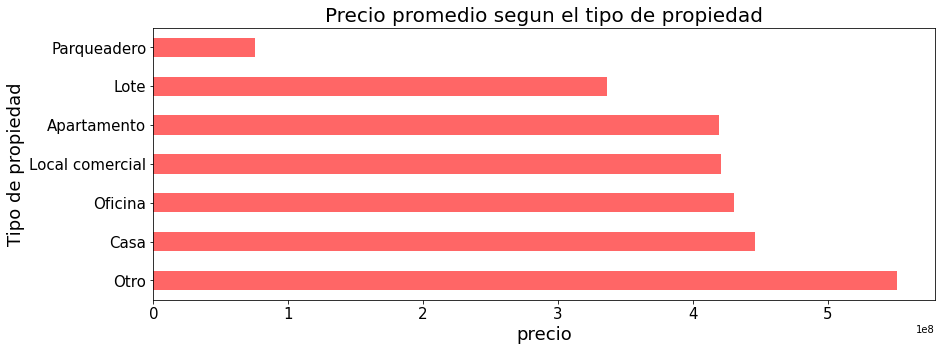

In [445]:
TipoDePropiedad = new_antioquia.groupby('property_type').mean()['price'].sort_values(ascending=False)
graph = TipoDePropiedad.plot.barh(figsize=(14,5),fontsize=15, color='r', alpha=0.6)
graph.set_title("Precio promedio segun el tipo de propiedad", fontsize=20)
graph.set_ylabel("Tipo de propiedad", fontsize=18)
graph.set_xlabel("precio", fontsize=18)
plt.show()

En este caso podemos evidenciar que el precio promedio de los tipos de propiedad de Casa y Oficina están más altos aunque no hay una diferencia tan significativa respecto a Apartamento y Local comercial.

Si fuera posible hacer una recomendación hacia properati seria significativo explorar y definir la variable Otro, ya que aunque es la mayor al entrar en detalle e identificar si estas variable corresponda a una de las otras podríamos tener un mejor panorama de cuál es el precio promedio más alto.

***¿Como esta distribuido el tipo de operacion del dataset?***

Como se evidencio al inicio hay en venta, arriendo y arriendo temporal sin embargo teniendo en cuenta lo mencionado previamente nos enfocaremos en venta.

***¿Cual es la cantidad de cuartos y el precio con base a los que posee la propiedad***

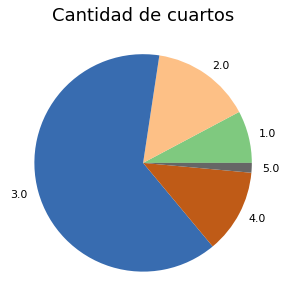

In [446]:
properati_room = new_antioquia.loc[new_antioquia.rooms < 6,['rooms','price']]
grouped_rooms = properati_room.groupby('rooms').size().plot(kind='pie', figsize=(5,5),cmap='Accent',fontsize=11)
plt.title('Cantidad de cuartos', fontsize = 18)
plt.ylabel('')
plt.show();

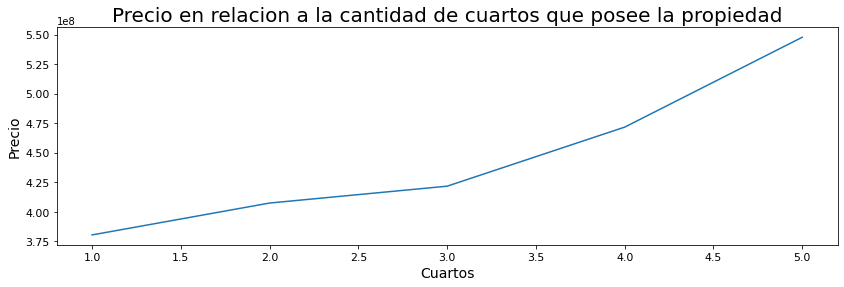

In [447]:
properati_room.groupby('rooms').mean()['price'].plot(figsize=(14,4),fontsize=11);
plt.title('Precio en relacion a la cantidad de cuartos que posee la propiedad', fontsize= 20);
plt.xlabel('Cuartos', fontsize = 14);
plt.ylabel('Precio', fontsize=14);
plt.show();

Observamos que a partir de tres cuartos hay un incremento notable en el precio; Estas preguntas y análisis nos permiten identificar recomendaciones complementarias que aunque incluso no incluyamos ciertas variables dentro de los modelos de machine learning nos permiten tener un panorama completo del mismo.

In [448]:
print(new_antioquia.shape)
new_antioquia.head()

(45745, 13)


,region,property_type,lat,lon,ciudad,barrio,rooms,bedrooms,bathrooms,surface_total,price,currency,operation_type
18,Cundinamarca,Casa,4.622658,-74.091189,Bogotá D.C,Zona Centro,3.0,3.0,3.0,208.5,99000000.0,COP,Venta
44,Cundinamarca,Oficina,4.704450,-74.040707,Bogotá D.C,Zona Norte,1.0,0.0,1.0,71.0,259200000.0,COP,Venta
76,Cundinamarca,Apartamento,4.639504,-74.140145,Bogotá D.C,Zona Suroccidental,3.0,2.0,2.0,90.0,227600000.0,COP,Venta
77,Cundinamarca,Apartamento,4.650855,-74.146378,Bogotá D.C,Zona Suroccidental,3.0,3.0,2.0,90.0,301082000.0,COP,Venta
78,Cundinamarca,Apartamento,4.652207,-74.139720,Bogotá D.C,Zona Suroccidental,3.0,2.0,2.0,90.0,255700000.0,COP,Venta


**MACHINE LEARNING**

Luego de todos los análisis realizados procedemos a plantear nuestro dataset definitivo con el que se generaran los modelos de machine learning.

In [449]:
new_antioquia1 =pd.DataFrame()

new_antioquia1 = new_antioquia.drop(['region'],axis = 1) 
new_antioquia1 = new_antioquia1.drop(['property_type'],axis = 1) 
new_antioquia1 = new_antioquia1.drop(['ciudad'],axis = 1) 
new_antioquia1 = new_antioquia1.drop(['barrio'],axis = 1) 
new_antioquia1 = new_antioquia1.drop(['currency'],axis = 1)
new_antioquia1 = new_antioquia1.drop(['operation_type'],axis = 1) 

In [450]:
print(new_antioquia1.shape)
new_antioquia1.head()

(45745, 7)


,lat,lon,rooms,bedrooms,bathrooms,surface_total,price
18,4.622658,-74.091189,3.0,3.0,3.0,208.5,99000000.0
44,4.704450,-74.040707,1.0,0.0,1.0,71.0,259200000.0
76,4.639504,-74.140145,3.0,2.0,2.0,90.0,227600000.0
77,4.650855,-74.146378,3.0,3.0,2.0,90.0,301082000.0
78,4.652207,-74.139720,3.0,2.0,2.0,90.0,255700000.0


**ARBOL DE DECISION**

In [451]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Inicialmente se dejan todas las variables para con ello determinar cuáles de ellas son las más importantes.
x = new_antioquia1.drop(['price'],axis = 1) 
y = new_antioquia1['price']

#Se procede a realizar la respectiva distribución de train y test para nuestros datos. Para todos los modelos se establecerá un random state de 42

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42)

Se define la variable de árbol de decisión y se procede a entrenar el modelo.

In [452]:
arbol = DecisionTreeRegressor()

In [453]:
arbol.fit(x_train,y_train)

DecisionTreeRegressor()

Ahora se procede a determinar sus score tanto en las variables de train como de test.

In [454]:
arbol.score(x_test,y_test)

0.5426909548728832

In [455]:
arbol.score(x_train,y_train)

0.9543465898190033

Procedemos a analizar cuáles son las características más importantes para el modelo a la hora de realizar la predicción.

D:\Miniconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


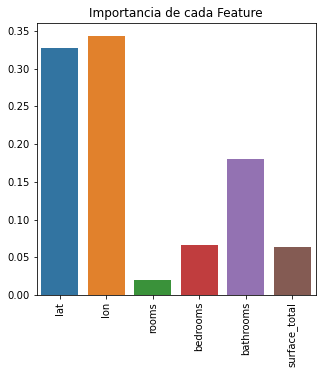

In [456]:
importances = arbol.feature_importances_
columns = x.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.xticks(rotation=90)
plt.show()

In [457]:
print(x.columns, arbol.feature_importances_)

Index(['lat', 'lon', 'rooms', 'bedrooms', 'bathrooms', 'surface_total'], dtype='object') [0.32709344 0.34326155 0.01991958 0.06635025 0.18001208 0.0633631 ]


In [458]:
frame=pd.DataFrame({'Columnas':x.columns,'Importancia_Feature':arbol.feature_importances_}) 

frame.sort_values(by=['Importancia_Feature'],ascending=False)

,Columnas,Importancia_Feature
1,lon,0.343262
0,lat,0.327093
4,bathrooms,0.180012
3,bedrooms,0.066350
5,surface_total,0.063363
2,rooms,0.019920


**Análisis de Hiperparámetros**

Para esta ocasión procederemos a analizar tanto la curva de validación normal como la realizada a través del proceso de validación cruzada con la finalidad de asegurar la mejor elección de hiperparámetros.

**Análisis para maxdepth**

Procedemos a realizar un análisis de algunos de los hiperparámetros con los que cuenta el árbol de decisión con el fin de mejorar aún más el modelo, siempre y cuando garanticemos no caiga en un sobreajuste o desajuste.

In [459]:
train_accuracy=[]
validation_accuracy=[]

#Se eligió el rango hasta 20 ya que no se veía mucha variación en el gráfico y en los puntajes de precisión luego de este valor. 

for depth in range(1,20):
    arbol1 = DecisionTreeRegressor(max_depth=depth, random_state=42) 
    arbol1.fit(x_train,y_train)
    train_accuracy.append(arbol1.score(x_train,y_train))
    validation_accuracy.append(arbol1.score(x_test,y_test))

In [460]:
frame=pd.DataFrame({'maxdepth':range(1,20), 'train_acc':train_accuracy,'valid_acc':validation_accuracy}) 

frame.sort_values(by=['maxdepth'],ascending=True)

,maxdepth,train_acc,valid_acc
0,1,0.130538,0.138759
1,2,0.223684,0.230650
2,3,0.302336,0.303649
3,4,0.372810,0.371596
4,5,0.445114,0.437117
5,6,0.498553,0.486943
6,7,0.546566,0.525705
7,8,0.586740,0.552853
8,9,0.624344,0.570437
9,10,0.659585,0.583475


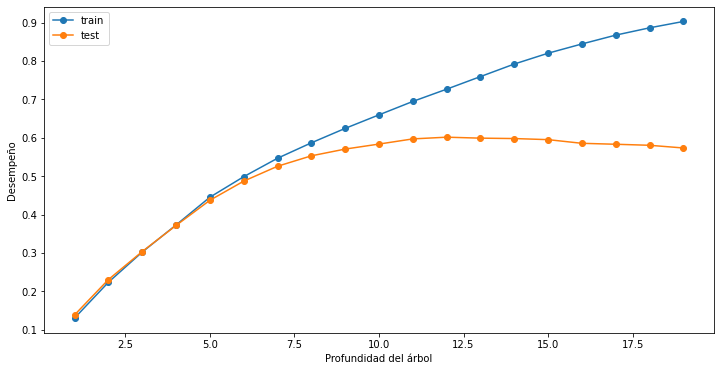

In [461]:
plt.figure(figsize=(12,6))
plt.plot(frame['maxdepth'], frame['train_acc'], marker='o',label='train')
plt.plot(frame['maxdepth'], frame['valid_acc'], marker='o',label='test')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Desempeño')
plt.legend()

In [462]:
from sklearn.model_selection import cross_validate

In [463]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,20,1)

for profundidad in profundidades:
    arbol1 = DecisionTreeRegressor(max_depth=profundidad)
    tree_scores = cross_validate(arbol1, x, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

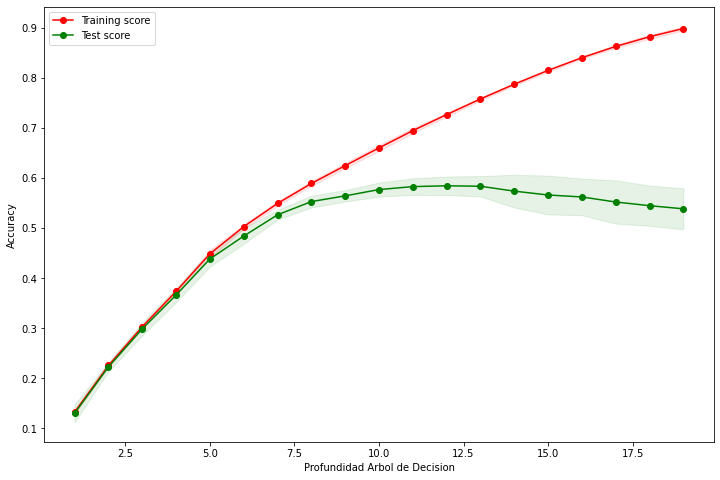

In [464]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Profundidad Arbol de Decision')
plt.show()

Se procede a elegir 12 como la profundidad adecuada para nuestro árbol de decisión.

**Análisis para min_samples_split**

In [465]:
train_accuracy=[]
validation_accuracy=[]

#Se eligió el rango hasta 10 ya que no se veía mucha variación en el gráfico y en los puntajes de precisión luego de este valor;
#En el caso de min samples split el número de menor valor posible a elegir es 2 por eso se inicia el rango por este número. 

for options in range(2,10):
    arbol1 = DecisionTreeRegressor(min_samples_split=options, random_state=42) 
    arbol1.fit(x_train,y_train)
    train_accuracy.append(arbol1.score(x_train,y_train))
    validation_accuracy.append(arbol1.score(x_test,y_test))

In [466]:
frame=pd.DataFrame({'min_samples_split':range(2,10), 'train_acc':train_accuracy,'valid_acc':validation_accuracy}) 

frame.sort_values(by=['min_samples_split'],ascending=True)

,min_samples_split,train_acc,valid_acc
0,2,0.954347,0.546987
1,3,0.945096,0.547789
2,4,0.934100,0.559041
3,5,0.921862,0.562531
4,6,0.910660,0.566478
5,7,0.899189,0.572398
6,8,0.888589,0.576832
7,9,0.879767,0.583902


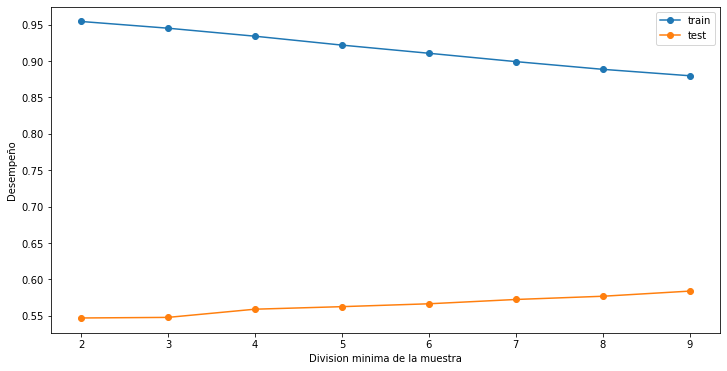

In [467]:
plt.figure(figsize=(12,6))
plt.plot(frame['min_samples_split'], frame['train_acc'], marker='o',label='train')
plt.plot(frame['min_samples_split'], frame['valid_acc'], marker='o',label='test')
plt.xlabel('Division minima de la muestra')
plt.ylabel('Desempeño')
plt.legend()

In [468]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,10,1)

for option in profundidades:
    arbol1 = DecisionTreeRegressor(min_samples_split=option)
    tree_scores = cross_validate(arbol1, x, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

D:\Miniconda\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "D:\Miniconda\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\Miniconda\lib\site-packages\sklearn\tree\_classes.py", line 1315, in fit
    super().fit(
  File "D:\Miniconda\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn(some_f

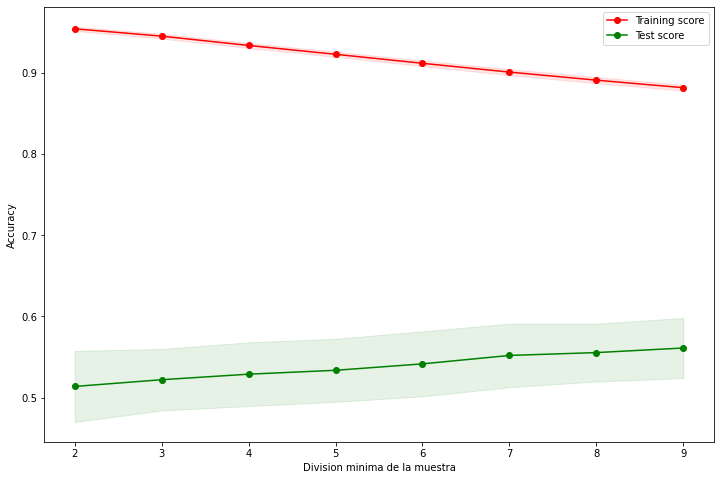

In [469]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Division minima de la muestra')
plt.show()

Se elige 5 como la división mínima de la muestra más adecuada.

**Análisis para min_samples_leaf**

In [470]:
train_accuracy=[]
validation_accuracy=[]

#Se eligió el rango hasta 10 ya que no se veía mucha variación en el gráfico y en los puntajes de precisión luego de este valor. 

for options1 in range(1,10):
    arbol1 = DecisionTreeRegressor(min_samples_leaf=options1, random_state=42) 
    arbol1.fit(x_train,y_train)
    train_accuracy.append(arbol1.score(x_train,y_train))
    validation_accuracy.append(arbol1.score(x_test,y_test))

In [471]:
frame=pd.DataFrame({'min_samples_leaf':range(1,10), 'train_acc':train_accuracy,'valid_acc':validation_accuracy}) 

frame.sort_values(by=['min_samples_leaf'],ascending=True)

,min_samples_leaf,train_acc,valid_acc
0,1,0.954347,0.546987
1,2,0.900367,0.582076
2,3,0.860139,0.592935
3,4,0.829500,0.604786
4,5,0.807620,0.609729
5,6,0.789218,0.616492
6,7,0.775590,0.615417
7,8,0.761709,0.622228
8,9,0.752453,0.620041


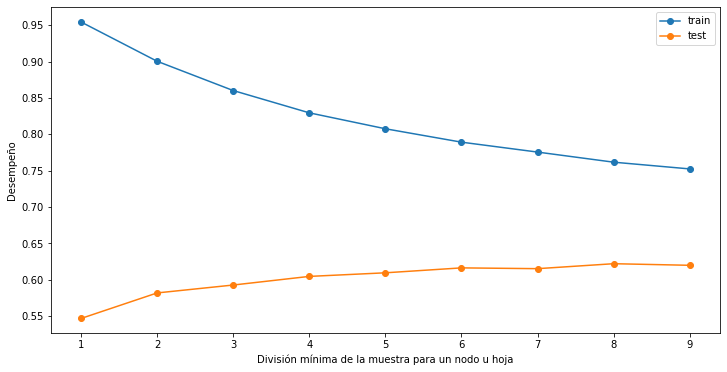

In [472]:
plt.figure(figsize=(12,6))
plt.plot(frame['min_samples_leaf'], frame['train_acc'], marker='o',label='train')
plt.plot(frame['min_samples_leaf'], frame['valid_acc'], marker='o',label='test')
plt.xlabel('División mínima de la muestra para un nodo u hoja')
plt.ylabel('Desempeño')
plt.legend()

In [473]:
tree_train_scores_mean = []
tree_train_scores_std = []
tree_test_scores_mean = []
tree_test_scores_std = []

profundidades = np.arange(1,10,1)

for option in profundidades:
    arbol1 = DecisionTreeRegressor(min_samples_leaf=options1)
    tree_scores = cross_validate(arbol1, x, y, cv=5, return_train_score=True, n_jobs = -1)
    
    tree_train_scores_mean.append(tree_scores['train_score'].mean())
    tree_train_scores_std.append(tree_scores['train_score'].std())
    
    tree_test_scores_mean.append(tree_scores['test_score'].mean())
    tree_test_scores_std.append(tree_scores['test_score'].std())

tree_train_scores_mean = np.array(tree_train_scores_mean)
tree_train_scores_std = np.array(tree_train_scores_std)
tree_test_scores_mean = np.array(tree_test_scores_mean)
tree_test_scores_std = np.array(tree_test_scores_std)

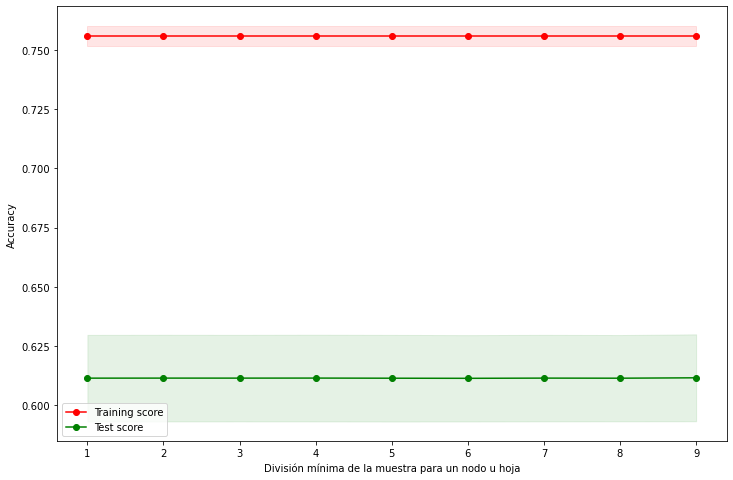

In [474]:
plt.figure(figsize=(12,8))
plt.fill_between(profundidades, tree_train_scores_mean - tree_train_scores_std,
                 tree_train_scores_mean + tree_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(profundidades, tree_test_scores_mean - tree_test_scores_std,
                 tree_test_scores_mean + tree_test_scores_std, alpha=0.1, color="g")
plt.plot(profundidades, tree_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(profundidades, tree_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('División mínima de la muestra para un nodo u hoja')
plt.show()

Se selecciona 6 como el más adecuado para la división mínima de la muestra para un nodo u hoja.

**Continuacion arbol de decisión**

En este punto ya hemos realizado varios hallazgos a nuestro análisis con lo que podemos generar un nuevo modelo para, filtrar por las variables más importantes encontradas, elegir los mejores hiperparámetros y hacer así más fácil la ejecución de un gridsearch.

In [475]:
x0 = new_antioquia1[['lon','lat','bathrooms','bedrooms']] 
y0 = new_antioquia1['price']

x_train0,x_test0,y_train0,y_test0 = train_test_split(x0,y0,random_state=42)

In [476]:
tree_regressor = DecisionTreeRegressor(max_depth=12,min_samples_leaf = 6, min_samples_split = 5)

In [477]:
tree_regressor.fit(x_train0, y_train0)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=6, min_samples_split=5)

In [478]:
tree_regressor.score(x_train0,y_train0)

0.6911969924768441

In [479]:
tree_regressor.score(x_test0,y_test0)

0.5942555530287086

**Grid Search**

Como ya hemos optimizado la mayoría de hiperparámetros solo incluiremos los hiperparámetros de splitter y criterion para encontrar el más adecuado con ayuda del gridsearch.

Nota: A pesar de la reducción de hiperparámetros a analizar, este proceso puede tardar en cargar

In [480]:
from sklearn.model_selection import GridSearchCV

# Grilla para Grid Search
parametros = {'splitter': ['best','random'],
              'criterion': ['squared_error','friedman_mse','absolute_error','poisson'], 
              } 

In [481]:
# ESTRATEGIA 1: Grid Search
modelo = GridSearchCV(tree_regressor, param_grid=parametros, cv=5)

# Entrenamos: tree_regresor con la grilla definida arriba y CV con tamaño de Fold=5
modelo.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(max_depth=12, min_samples_leaf=6,
                                             min_samples_split=5),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'splitter': ['best', 'random']})

In [482]:
print("Mejores parametros: "+str(modelo.best_params_))
print("Mejor Score: "+str(modelo.best_score_)+'\n')

scores = pd.DataFrame(modelo.cv_results_)
scores

Mejores parametros: {'criterion': 'friedman_mse', 'splitter': 'best'}
Mejor Score: 0.5955916516119244



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050312,0.000602,0.002401,4.900962e-04,squared_error,best,"{'criterion': 'squared_error', 'splitter': 'be...",0.592120,0.593882,0.594066,0.605693,0.590563,0.595265,0.005368,2
1,0.010802,0.000400,0.002000,3.873843e-07,squared_error,random,"{'criterion': 'squared_error', 'splitter': 'ra...",0.473400,0.465294,0.436335,0.489457,0.502128,0.473323,0.022462,4
2,0.049611,0.001200,0.002001,3.814697e-07,friedman_mse,best,"{'criterion': 'friedman_mse', 'splitter': 'best'}",0.593103,0.593784,0.594973,0.605535,0.590563,0.595592,0.005177,1
3,0.010402,0.000490,0.001400,4.898819e-04,friedman_mse,random,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.451554,0.410643,0.391561,0.536588,0.443938,0.446857,0.049903,5
4,9.786986,0.025829,0.002401,4.900768e-04,absolute_error,best,"{'criterion': 'absolute_error', 'splitter': 'b...",0.575671,0.571661,0.580884,0.586217,0.588915,0.580670,0.006402,3
5,6.676178,0.934879,0.002001,5.560829e-07,absolute_error,random,"{'criterion': 'absolute_error', 'splitter': 'r...",0.463614,0.478784,0.487818,0.377054,0.424121,0.446278,0.040904,6
6,0.071434,0.001045,0.001801,3.999718e-04,poisson,best,"{'criterion': 'poisson', 'splitter': 'best'}",0.236470,0.252846,0.236237,0.244069,0.234592,0.240843,0.006839,8
7,0.014402,0.001019,0.001401,4.895900e-04,poisson,random,"{'criterion': 'poisson', 'splitter': 'random'}",0.230709,0.304703,0.278780,0.295391,0.283274,0.278571,0.025608,7


**Árbol de decisión final optimizado**

Aunque los score de nuestro árbol de decisión no son tan altos, tenemos la garantía de no estar cayendo en sobreajuste o desajuste; es decir el mejor analisis posible con la menor cantidad de errores.

In [485]:
tree_regressor1 = DecisionTreeRegressor(max_depth=12,min_samples_leaf = 6, min_samples_split = 5, criterion = 'friedman_mse', splitter = 'best')

In [486]:
tree_regressor1.fit(x_train0, y_train0)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12,
                      min_samples_leaf=6, min_samples_split=5)

In [487]:
tree_regressor1.score(x_train0,y_train0)

0.6911969924768441

In [488]:
tree_regressor1.score(x_test0,y_test0)

0.5943848111772676

**NUEVO MODELO DE MACHINE LEARNING = XGBOOST**

Procedemos a plantear un nuevo modelo el cual nos permita comparar y determinar tanto los score como aquellas caracteristicas mas importantes y con ello tambien dterminar si los mismos coinciden.

In [489]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor


In [490]:
x1_1 = new_antioquia1.drop(['price'],axis = 1) 
y1_1 = new_antioquia1['price']

In [491]:
x_train1_1,x_test1_1,y_train1_1,y_test1_1 = train_test_split(x,y,random_state=42)

In [492]:
x_train1_1.shape, x_test1_1.shape

((34308, 6), (11437, 6))

In [493]:
model = XGBRegressor()

In [494]:
model.fit(x_train1_1,y_train1_1)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [495]:
model.score(x_test1_1, y_test1_1)

0.6609897375524534

In [496]:
model.score(x_train1_1, y_train1_1)

0.743091207906124

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

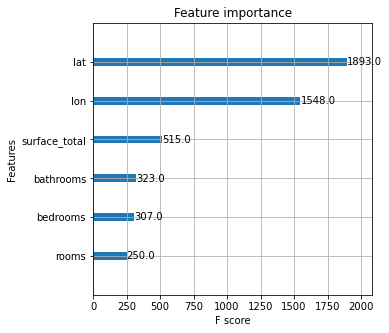

In [497]:
xgb.plot_importance(model, ax=plt.gca())

**MODELO DEFINITIVO DE XGBOOST**

In [498]:
x1_2 = new_antioquia1[['lon','lat','bathrooms','surface_total']] 
y1_2 = new_antioquia1['price']

x_train1_2,x_test1_2,y_train1_2,y_test1_2 = train_test_split(x1,y1,random_state=42)

In [499]:
model1 = XGBRegressor()

In [500]:
model1.fit(x_train1_2,y_train1_2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [501]:
model1.score(x_test1_2, y_test1_2)

0.6186884352699726

In [502]:
model1.score(x_train1_2, y_train1_2)

0.6970550997816565

## Interpretación de modelos

**Evaluación de los modelos**

Procedemos a definir una función que nos permita evaluar los modelos con la finalidad de poder determinar cuál es el mejor.

In [503]:
def evaluar_regresion(model,x,y, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import mean_squared_error
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')

    plt.figure(figsize = (15,4))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()


    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

**Evaluación para el modelo árbol de decisión**

Raíz del error cuadrático medio en Train: 116311446.5883746
Raíz del error cuadrático medio en Test: 134488142.38748327


D:\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


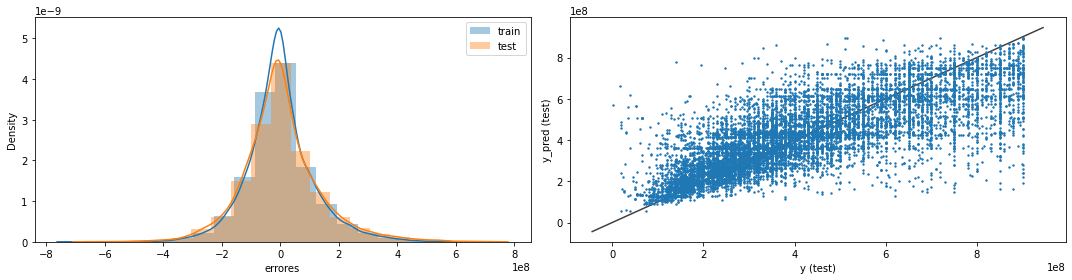

In [504]:
evaluar_regresion(tree_regressor1,x0,y0, x_train0, x_test0, y_train0, y_test0)

**Evaluación para el modelo xgboost**

Raíz del error cuadrático medio en Train: 115202928.57929279
Raíz del error cuadrático medio en Test: 130396783.51050498


D:\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Miniconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


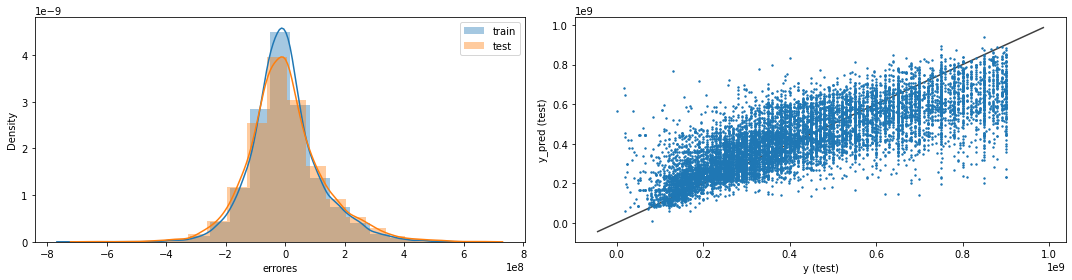

In [505]:
evaluar_regresion(model1,x1,y1, x_train1_2, x_test1_2, y_train1_2, y_test1_2)

**CONCLUSIONES**

* Aunque no es una diferencia tan alta podemos evidenciar que para este caso nuestro mejor modelo será el correspondiente al de XGBoost ya que es el que menos cantidad de errores está cometiendo de acuerdo a la evaluación realizada.

* En definitiva para este dataset las variables de lat y lon son las más importantes; es decir que en la región de Antioquia en Colombia la ubicación juega un papel fundamental en el precio, lo cual es de esperarse teniendo en cuenta que entran en juego temas de seguridad de facilidad de desplazamiento y otros relacionados justamente con la ubicación de un predio.

* Sin importar el tipo de propiedad para la variable bathrooms contar con más de uno por predio será algo que suma y aporta al valor total del predio.